In [49]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import sklearn.datasets
from xgboost import XGBRegressor
from sklearn import metrics

# importing Boston House price dataset 

In [50]:
df = pd.read_csv('BostonHousing.csv')

In [51]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [52]:
df.shape

(506, 14)

In [53]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [73]:
df = df.fillna(df['rm'].mean())
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

# statical measures of dataset

In [74]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,3.647414,11.402196,11.160619,0.069860,0.555151,6.284341,68.513373,3.786423,9.596806,409.143713,18.453493,356.298523,12.643752,22.561277
std,8.637688,23.414214,6.857123,0.255166,0.116186,0.705587,28.212221,2.103327,8.735509,169.021216,2.166327,91.672055,7.162746,9.232435
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081990,0.000000,5.190000,0.000000,0.449000,5.884000,45.000000,2.088200,4.000000,279.000000,17.400000,375.210000,6.920000,17.000000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.182700,5.000000,330.000000,19.000000,391.340000,11.380000,21.200000
75%,3.693110,12.500000,18.100000,0.000000,0.624000,6.625000,94.000000,5.118000,24.000000,666.000000,20.200000,396.230000,16.940000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [75]:
## positive correlation and negative correlation
## in positive increase is directly proportional to increase and in Negative its indirectly proportional

In [76]:
correlation = df.corr()

<AxesSubplot:>

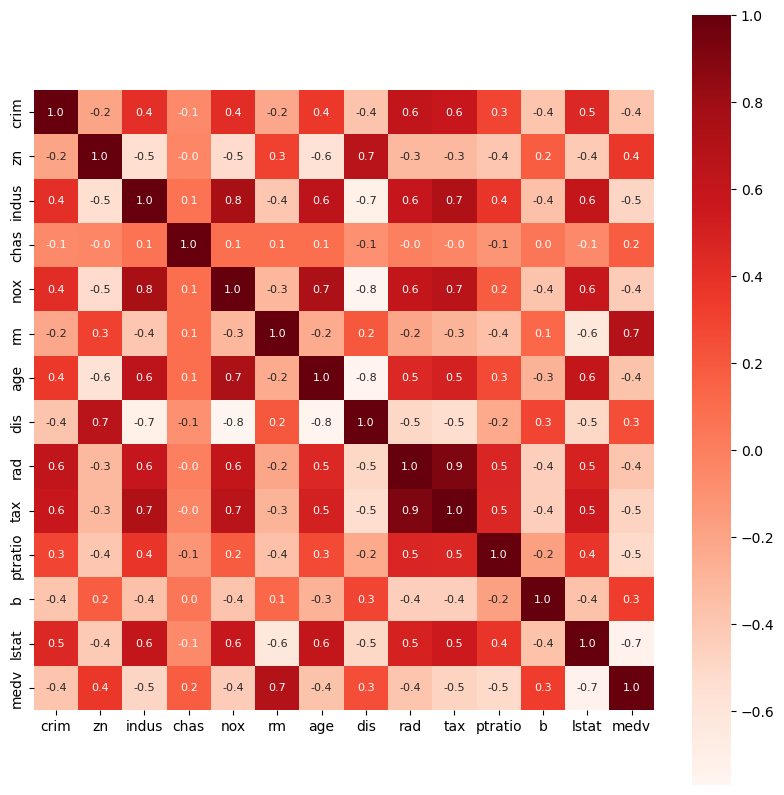

In [77]:
plt.figure(figsize= (10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True,annot_kws={'size':8}, cmap='Reds')

In [78]:
x = df.drop(['medv'], axis = 1)
y = df['medv']

In [79]:
print(x,y)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [80]:
#Split into train and test
x_train ,x_test,y_train,y_test =train_test_split(x,y,train_size = 0.2,random_state = 42)

In [81]:
print(x.shape,x_train.shape,x_test.shape)

(501, 13) (100, 13) (401, 13)


In [82]:
## MODEL TRAINING USING XGBOOST

In [83]:
model = XGBRegressor()

In [84]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [85]:
training_data_prediction = model.predict(x_train)
training_data_prediction

array([28.70039  , 24.799225 , 20.099558 , 43.99991  , 24.499306 ,
       13.799747 , 22.797745 , 20.599415 , 32.39976  , 24.397432 ,
       50.000183 , 19.300077 , 27.499544 , 11.899154 , 49.999107 ,
       23.800482 , 36.501186 , 19.399881 , 35.40029  , 12.700628 ,
       21.599567 , 12.600969 , 15.201604 , 20.500916 , 11.700411 ,
       22.900482 , 21.699635 , 20.001219 , 43.50044  , 16.100311 ,
       49.999886 , 20.600267 , 31.200447 , 21.399511 , 18.900206 ,
       22.901045 , 20.699957 , 24.30051  , 18.201292 , 23.801115 ,
       22.00064  ,  9.700463 , 29.098541 , 19.101318 , 22.200266 ,
       21.20048  , 17.79931  , 22.100372 , 19.101461 , 24.999754 ,
       24.499212 , 24.69957  , 50.000244 , 24.99994  , 19.49943  ,
       37.19942  , 13.399832 , 29.099388 , 20.599737 , 36.39965  ,
       22.59894  , 18.699665 , 19.70005  , 26.59926  , 22.000412 ,
       49.99993  , 15.200331 , 23.100372 , 21.398552 , 24.997135 ,
       35.399868 , 14.100146 , 33.300266 , 15.097766 , 22.5013

In [86]:
# R squared error
score_1 = metrics.r2_score(y_train, training_data_prediction)
# MEan absolute error
score_2 = metrics.mean_squared_error(y_train, training_data_prediction)
print("R squared error :", score_1)
print("Mean squared error", score_2)

R squared error : 0.9999999904536677
Mean squared error 8.391082803428445e-07


In [87]:
test_data_prediction = model.predict(x_test)

In [91]:
# R squared error
score_3 = metrics.r2_score(y_test, test_data_prediction)
# MEan absolute error
score_4 = metrics.mean_squared_error(y_test, test_data_prediction)
print("R squared error :", score_3)
print("Mean squared error", score_4)

R squared error : 0.8458274642317072
Mean squared error 12.92637117386644


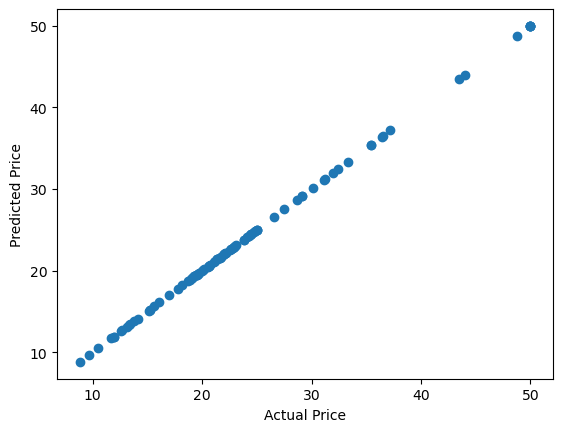

In [89]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

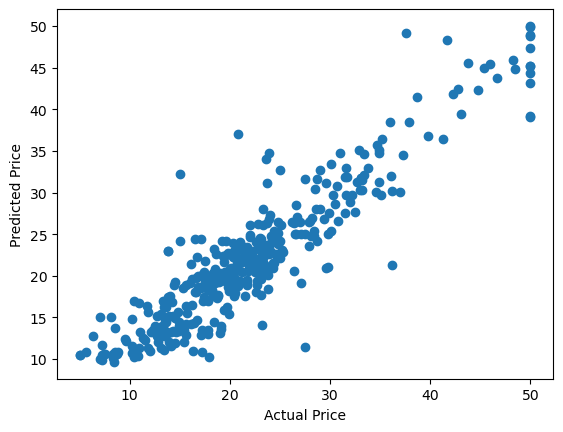

In [90]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()